In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {}
dates = ["09/22", "10/28", "11/15"]
for date in dates:
    data[date] = {}
    path_start = f"../data/{date.replace('/','')}/{date.replace('/','')}_"
    data[date]["str_lab"] = pd.read_excel(f"{path_start}str_labels.xlsx", index_col=0)
    data[date]["bin_lab"] = pd.read_excel(f"{path_start}bin_labels.xlsx", index_col=0)
    data[date]["reads"] = pd.read_excel(f"{path_start}reads.xlsx", index_col=0)
    data[date]["editfrac"] = pd.read_excel(f"{path_start}editfrac.xlsx", index_col=0)


# Read counts/edit fraction distributions

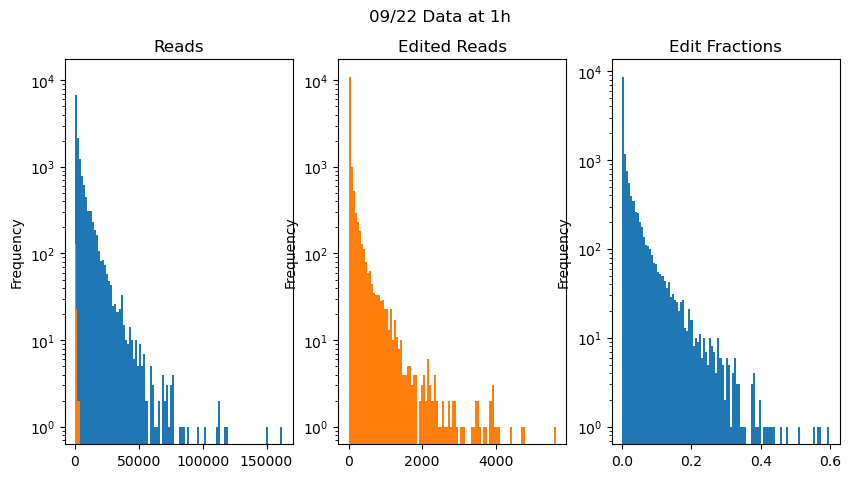

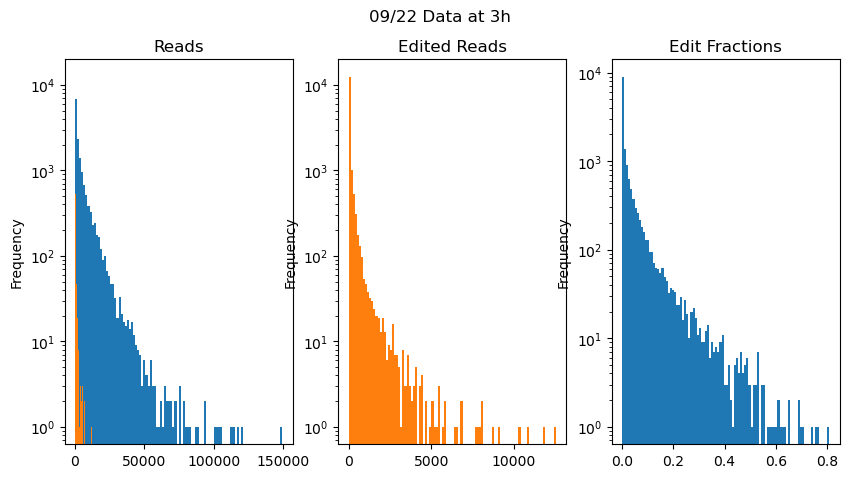

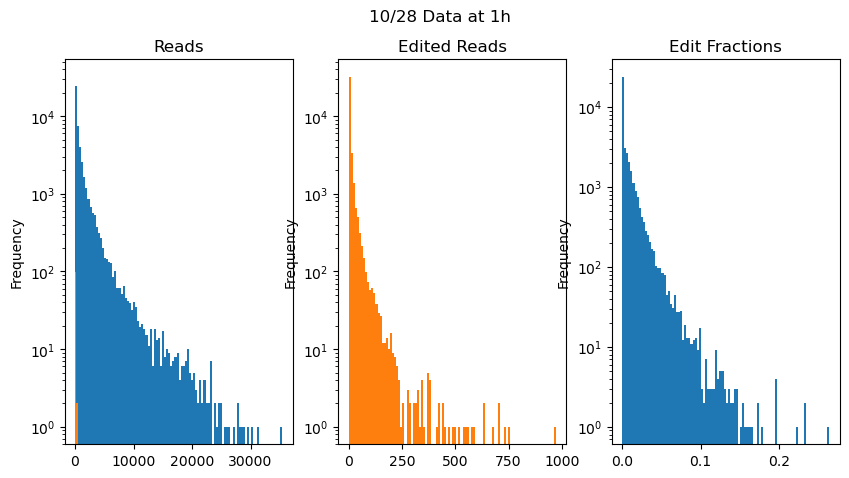

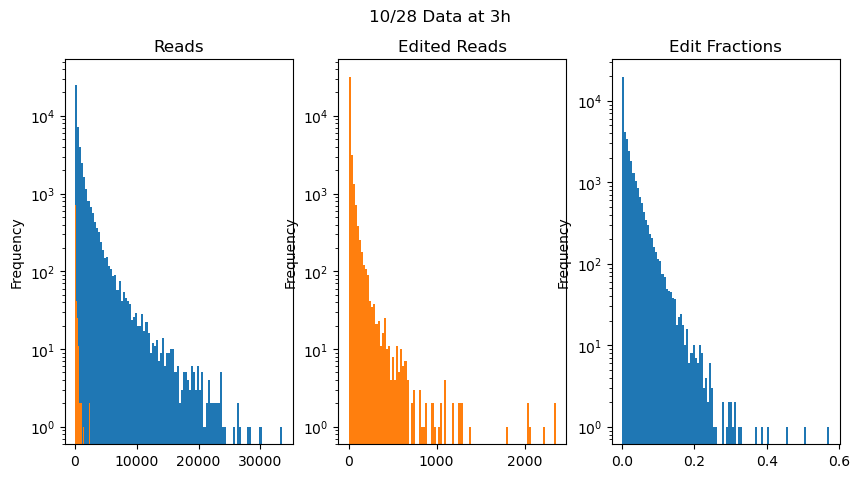

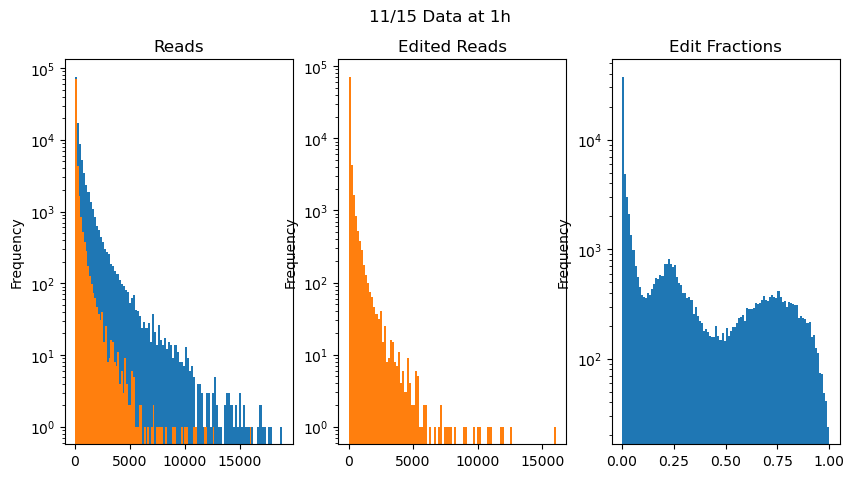

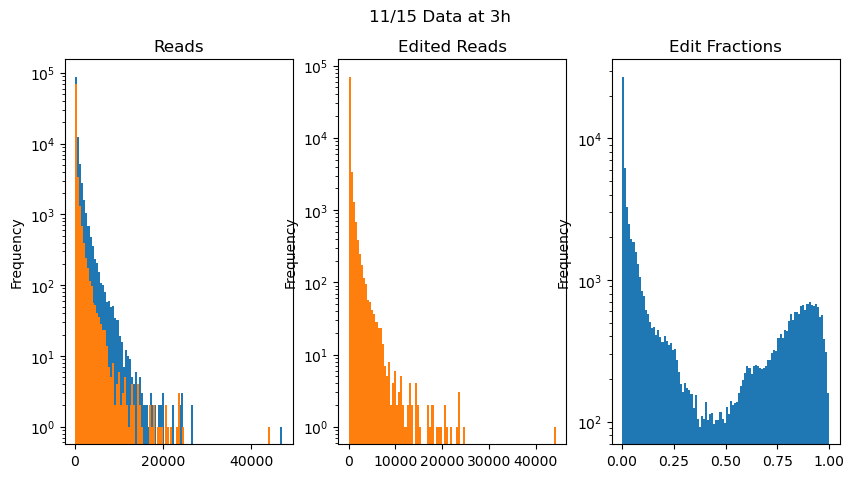

In [14]:
for date in dates:
    for time in ["1h", "3h"]:
        cols = [col for col in data[date]["reads"].columns if time in col.lower() and "REPLICATE" not in col and "CDNA" not in col]
        fig, axs = plt.subplots(1,3,figsize=(10,5))
        plt.suptitle(f"{date} Data at {time}")
        data[date]["reads"][cols].stack().plot.hist(ax=axs[0], bins=100)
        data[date]["reads"][cols].mul(data[date]["editfrac"][cols]).stack().plot.hist(ax=axs[0], bins=100, logy=True)
        data[date]["reads"][cols].mul(data[date]["editfrac"][cols]).stack().plot.hist(ax=axs[1], bins=100, logy=True, color=["#ff7f0e"])
        axs[0].set_title('Reads')
        axs[1].set_title('Edited Reads')
        data[date]["editfrac"][cols].stack().plot.hist(ax=axs[2], bins=100, logy=True)
        axs[2].set_title('Edit Fractions')
